## Get a list of paths with respect to bone age X-ray images

In [55]:
from glob import glob
from scipy import misc
from skimage import exposure, io, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

paths = glob('../boneage-training-dataset/*.png')
total_set = len(paths)
num_testing_set = int(total_set/5)
num_training_set = total_set - num_testing_set
print(total_set, num_testing_set, num_training_set)

6000 1200 4800


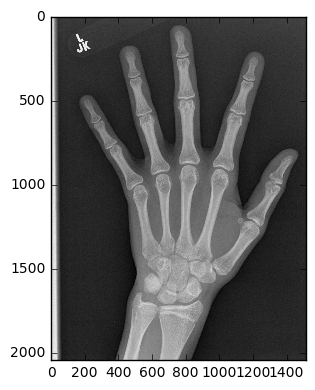

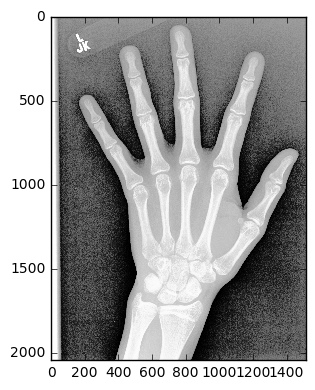

In [35]:
img = misc.imread(paths[0])
# Equalization
img_eq = exposure.equalize_hist(img)

#img_eq2 = exposure.equalize_hist(img_eq)

#Display Image
io.imshow(img,cmap=plt.cm.gray)
io.show()
io.imshow(img_eq,cmap=plt.cm.gray)
io.show()

/Users/jameszhang/anaconda2/envs/py_35/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


[[255 254 255 ..., 161 163 163]
 [255 255 255 ..., 163 163 157]
 [255 255 255 ..., 160 162 159]
 ..., 
 [254 254 254 ..., 114 110 126]
 [255 254 254 ..., 123 126 126]
 [254 253 255 ..., 128 130 135]]
[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]]


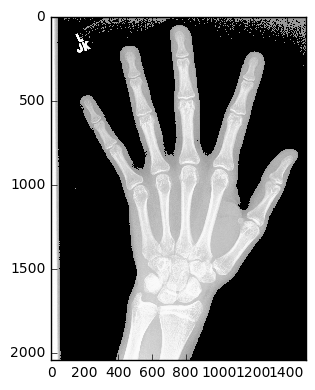

In [58]:
img = misc.imread(paths[0])
img_eq = img_as_ubyte(exposure.equalize_hist(img))
thresh = 150
print(img_eq)
idx = img_eq[:, :] <= thresh
print(idx)
img_eq[idx] = 0
io.imshow(img_eq, cmap=plt.cm.gray)
io.show()

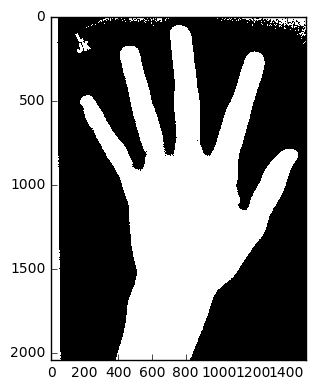

In [133]:
from skimage.morphology import binary_opening, binary_closing, square
img_opening = binary_opening(img_eq, square(3))
io.imshow(img_opening, cmap=plt.cm.gray)
io.show()

[[ 1  1  1 ..., 19 19 19]
 [ 1  1  1 ..., 19 19 19]
 [ 1  1  1 ..., 19 19 19]
 ..., 
 [ 1  1  1 ...,  0  0  0]
 [ 1  1  1 ...,  0  0  0]
 [ 1  1  1 ...,  0  0  0]] 308
[1853606   95332       9       9    2265    3149      12       9       9
       9       9      15     168      57      18      37     115      16
     608   13013      12      35      12      27       9      15      36
       9      19       9      15       9       9      56       9      15
      16       9      43      43       9      34      12       9      15
      25      15      16       9      12      15      18      24       9
       9       9      12      21       9       9       9       9      24
      19      17       9       9      12      18      22      17      15
       9       9      69      30       9      15      46      24      81
      14      21       9       9      12     264       9      17      15
      25      57       9      12      40      68       9       9       9
      12      30      20     

/Users/jameszhang/anaconda2/envs/py_35/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


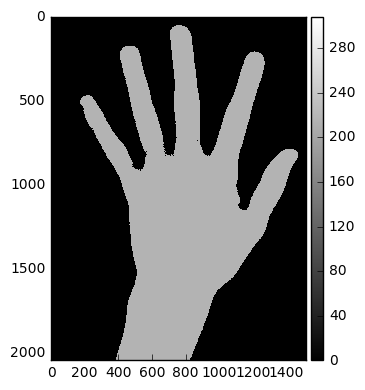

In [134]:
from scipy.ndimage import label
labeled_img, nlabels = label(img_opening)
print(labeled_img, nlabels)
cluster_size = np.bincount(labeled_img.ravel())
print(cluster_size)
fourth_large = sorted(cluster_size)[-4]
print(fourth_large)
for i in range(1, nlabels):
    coord = np.where(labeled_img == i)
    if cluster_size[i] <= fourth_large:
        labeled_img[coord] = 0
io.imshow(labeled_img, cmap=plt.cm.gray)
io.show()

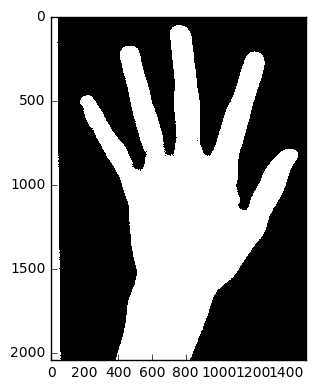

In [135]:
new = np.zeros(labeled_img.shape)
new[labeled_img >= 1] = 1

io.imshow(new, cmap=plt.cm.gray)
io.show()

[[1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 ..., 
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]]
[[255 254 255 ...,   0   0   0]
 [255 255 255 ...,   0   0   0]
 [255 255 255 ...,   0   0   0]
 ..., 
 [254 254 254 ...,   0   0   0]
 [255 254 254 ...,   0   0   0]
 [254 253 255 ...,   0   0   0]]


/Users/jameszhang/anaconda2/envs/py_35/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


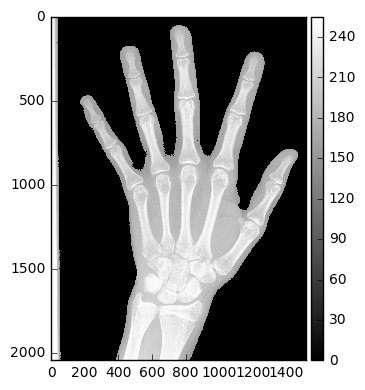

In [137]:
labeled_img[labeled_img >= 1] = 1
img_after_label = img_eq * labeled_img
print(labeled_img)
print(img_after_label)

io.imshow(img_after_label, cmap=plt.cm.gray)
io.show()

[[255 255 255 ...,   0   0   0]
 [255 255 255 ...,   0   0   0]
 [255 255 255 ...,   0   0   0]
 ..., 
 [254 254 254 ...,   0   0   0]
 [255 254 254 ...,   0   0   0]
 [255 255 255 ...,   0   0   0]]


/Users/jameszhang/anaconda2/envs/py_35/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


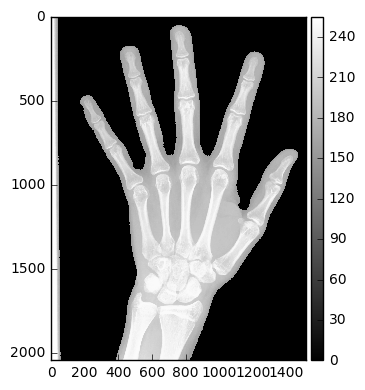

In [150]:
from skimage.morphology import closing
img_closing = closing(img_after_label, square(5))
print(img_closing)
io.imshow(img_closing, cmap=plt.cm.gray)
io.show()

[[  1.18976459e-07   1.18976459e-07   1.18976459e-07 ...,   2.32830644e-10
    2.32830644e-10   2.32830644e-10]
 [  1.18976459e-07   1.18976459e-07   1.18976459e-07 ...,   2.32830644e-10
    2.32830644e-10   2.32830644e-10]
 [  1.18976459e-07   1.18976459e-07   1.18976459e-07 ...,   2.32830644e-10
    2.32830644e-10   2.32830644e-10]
 ..., 
 [  1.18555201e-07   1.18516210e-07   1.18510934e-07 ...,   2.32830644e-10
    2.32830644e-10   2.32830644e-10]
 [  1.18887679e-07   1.18599577e-07   1.18560574e-07 ...,   2.32830644e-10
    2.32830644e-10   2.32830644e-10]
 [  1.18971046e-07   1.18932056e-07   1.18926669e-07 ...,   2.32830644e-10
    2.32830644e-10   2.32830644e-10]]


/Users/jameszhang/anaconda2/envs/py_35/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


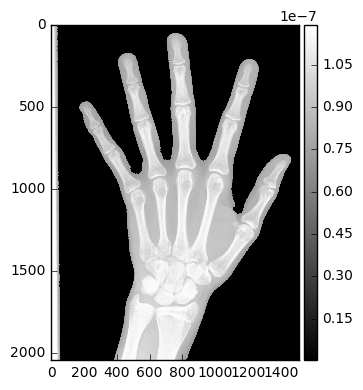

In [152]:
from skimage.filters import gaussian
img_smooth = gaussian(img_closing, sigma=0.5)
print(img_smooth)
io.imshow(img_smooth, cmap=plt.cm.gray)
io.show()

In [153]:
from PIL import Image
im = Image.fromarray(img_closing)
print(np.max(img_closing))
print(im)
if im.mode != 'RGB':
    im = im.convert('RGB')
im.save("first_test.png")

255
<PIL.Image.Image image mode=I size=1514x2044 at 0x1119E2198>
